In [47]:
# importing analysis and visualization packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [34]:
#reading in cleaned sleep data
df = pd.read_csv(r'C:\Users\sbsch\source\repos\Case-Study-Sleep-Quality\Data\sleep_data.csv')

In [35]:
df.head()

,sleep_date,duration_hrs,total_rem_hrs,total_deep_hrs,total_light_hrs,total_interpurt_hrs,total_unknown_hrs,total_toss_turns
0,2013-01-09,7.066667,0.0,0.0,0.0,0.0,0.0,0
1,2013-01-10,4.583333,0.0,0.0,0.0,0.0,0.0,0
2,2013-01-11,8.250000,0.0,0.0,0.0,0.0,0.0,0
3,2013-01-12,7.816667,0.0,0.0,0.0,0.0,0.0,0
4,2013-01-13,7.916667,0.0,0.0,0.0,0.0,0.0,0


In [36]:
# checking data type
type(df['sleep_date'][2])

str

In [38]:
df['sleep_date'] = pd.to_datetime(df['sleep_date'])

In [39]:
# checking if recasting worked
type(df['sleep_date'][2])

pandas._libs.tslibs.timestamps.Timestamp

In [49]:
#creating a temp data frame that only includes data after sleep stage software update
df_temp = df
df_temp['sleep_stage_sum'] = df['total_rem_hrs'] + df['total_deep_hrs'] + df['total_interpurt_hrs'] + df['total_unknown_hrs']

df_stages = df_temp[df_temp['sleep_stage_sum'] > 0]

In [50]:
# transforming into long format. only used when analyzing sleep stages
df_long = pd.melt(df_stages, id_vars = ['sleep_date', 'duration_hrs', 'total_toss_turns'],
                  value_vars = ['total_rem_hrs', 'total_deep_hrs', 'total_light_hrs',
                                'total_interpurt_hrs', 'total_unknown_hrs'])

In [17]:
df_long.head()

,sleep_date,duration_hrs,total_toss_turns,variable,value
0,2014-01-20,7.033333,30,total_rem_hrs,1.150000
1,2014-01-31,10.150000,48,total_rem_hrs,1.800000
2,2014-02-20,6.766667,29,total_rem_hrs,1.083333
3,2014-02-27,7.316667,23,total_rem_hrs,1.916667
4,2014-03-01,7.816667,42,total_rem_hrs,1.483333


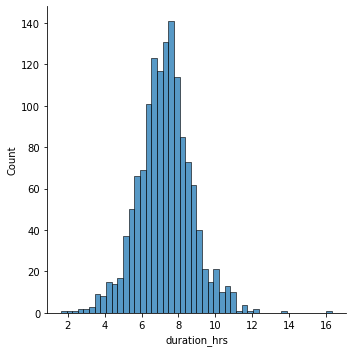

In [24]:
sns.displot(df['duration_hrs'])

<AxesSubplot:xlabel='total_rem_hrs', ylabel='duration_hrs'>

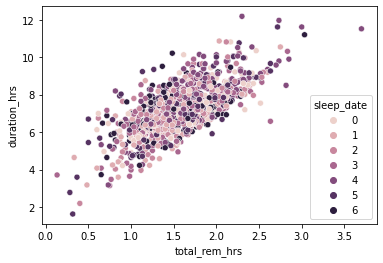

In [45]:
sns.scatterplot(x = 'total_rem_hrs', y = 'duration_hrs', data = df_stages, hue = (df_stages['sleep_date'].dt.weekday))

TypeError: The DTypes <class 'numpy.dtype[uint8]'> and <class 'numpy.dtype[datetime64]'> do not have a common DType. For example they cannot be stored in a single array unless the dtype is `object`.

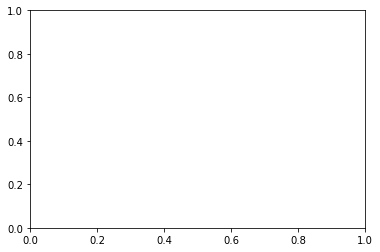

In [51]:
df_long.set_index(df_long['sleep_date'].dt.weekday).plot(kind='bar', stacked=True)